# Doel: Sklearn leren 

- Veel van deze serie: https://www.youtube.com/watch?v=IsXXlYVBt1M&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=2

## Simpel beginnen

Imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # data visualization
from sklearn import datasets # load standard datasets

%matplotlib inline 

In [21]:
iris = datasets.load_iris()

print(iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [22]:
# matrix of features
X = iris.data 

# target variales
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


# _Step 1_ Import Class

In [23]:
from sklearn import neighbors 

# _Step 2_ Instantiate classifier/estimator object

In [24]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# _Step 3_ Fit/Train on the training data

In [25]:
knn.fit(X, y);

# _Step 4_ Predict the response on new data

- Returns a numpy array
- Needs a numpy array / list as as input

In [26]:
knn.predict([[5,3,2,4], [3,6,4,3]])

array([1, 1])

# Cross validation for testing scores

- Documentation: http://scikit-learn.org/stable/modules/cross_validation.html
- import
    - Ik kreeg ImportError bij sklearn.model_selection.
      Als dit gebeurt moet je het pakket upgraden (via anaconda):
    
      In windows terminal: ``` conda update scikit-learn ``` 
      
## Splitting the data in test and train

In [27]:
# splits dataset into test and training sets
from sklearn.model_selection import train_test_split 

# support vector machine classifiers
from sklearn import svm


In [28]:
# split 40% into test, random with seed 0 
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)                         

(90, 4) (90,)
(60, 4) (60,)
5


In [29]:
# fit the data
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

# score for the estimator
clf.score(X_test, y_test)     

0.96666666666666667

## Real Cross-validation

- cv: split data into cv parts

- returns: array of scores

In [30]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores                                              


array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])

## Computing confidence interval

In [36]:
print("Accuracy: {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std() * 2)) 

Accuracy: 0.98 (+/- 0.03)


# Using pandas for storing data

Handig: http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [39]:
import pandas as pd

# read CSV file directly from a URL and save the results
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first 5 rows
df.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [40]:
df.tail()

TV  Radio  Newspaper  Sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

Primary object types:

- DataFrame: rows and columns (like a spreadsheet)
- Series: a single column

In [62]:
# check the shape of the DataFrame (rows, columns)
data.shape

# the most basic way of getting information on the dataframe
data.info()

# descriptive statistics
data.describe()

# erase null values
data = data[data.notnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
6      8.7   48.9       75.0    7.2
7     57.5   32.8       23.5   11.8
8    120.2   19.6       11.6   13.2
9      8.6    2.1        1.0    4.8
10   199.8    2.6       21.2   10.6
11    66.1    5.8       24.2    8.6
12   214.7   24.0        4.0   17.4
13    23.8   35.1       65.9    9.2
14    97.5    7.6        7.2    9.7
15   204.1   32.9       46.0   19.0
16   195.4   47.7       52.9   22.4
17    67.8   36.6      114.0   12.5
18   281.4   39.6       55.8   24.4
19    69.2   20.5       18.3   11.3
20   147.3   23.9       19.1   14.6
21   218.4   27.7       53.4   18.0
22   237.4    5.1       23.5   12.5
23    13.2   15.9       49.6    5.6
24   228.3   16.9       26.2   15.5
25    62.3   12.6       18.3    9.7
26   262.9    3.5       19.5   12.0
27   142.9   29.3       12.6   15.0
28   240.1   16.7       22.9   15.9
29   248.8   27.1       22.9   18.9
30    70.6   16.0       40.8   10.5
..     ...    ...        ...    ...
171   50.0   11.6       18.4    8.4
172  164.5   20.9       47.4   14.5
173   19.6   20.1       17.0    7.6
174  168.4    7.1       12.8   11.7
175  222.4    3.4       13.1   11.5
176  276.9   48.9       41.8   27.0
177  248.4   30.2       20.3   20.2
178  170.2    7.8       35.2   11.7
179  276.7    2.3       23.7   11.8
180  165.6   10.0       17.6   12.6
181  156.6    2.6        8.3   10.5
182  218.5    5.4       27.4   12.2
183   56.2    5.7       29.7    8.7
184  287.6   43.0       71.8   26.2
185  253.8   21.3       30.0   17.6
186  205.0   45.1       19.6   22.6
187  139.5    2.1       26.6   10.3
188  191.1   28.7       18.2   17.3
189  286.0   13.9        3.7   15.9
190   18.7   12.1       23.4    6.7
191   39.5   41.1        5.8   10.8
192   75.5   10.8        6.0    9.9
193   17.2    4.1       31.6    5.9
194  166.8   42.0        3.6   19.6
195  149.7   35.6        6.0   17.3
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

# Visualizing data using seaborn

- Seaborn: Python library for statistical data visualization built on top of Matplotlib
- Anaconda users: run conda install seaborn from the command line

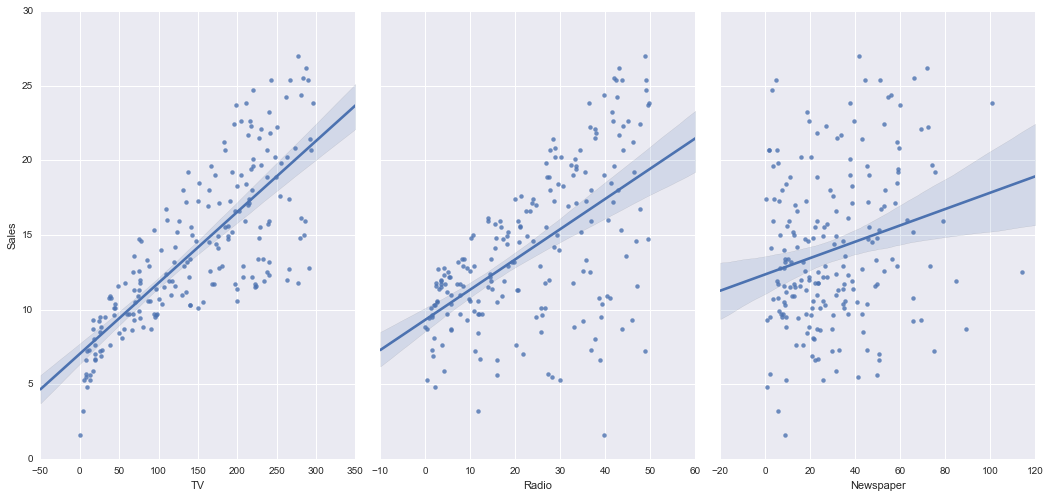

In [43]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

# Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [44]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4

In [45]:

# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [46]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64